In [1]:
## http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/kaggle/titanic.ipynb

## Kaggle Machine Learning Competition: Predicting Titanic Survivors

import pandas as pd
import numpy as np
import pylab as plt

## Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

## Size of %matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

## Size of matplotlib histogram bins
bin_size = 10


In [2]:
## Explore the data
df_train = pd.read_csv('/Users/liuchang/Desktop/all/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


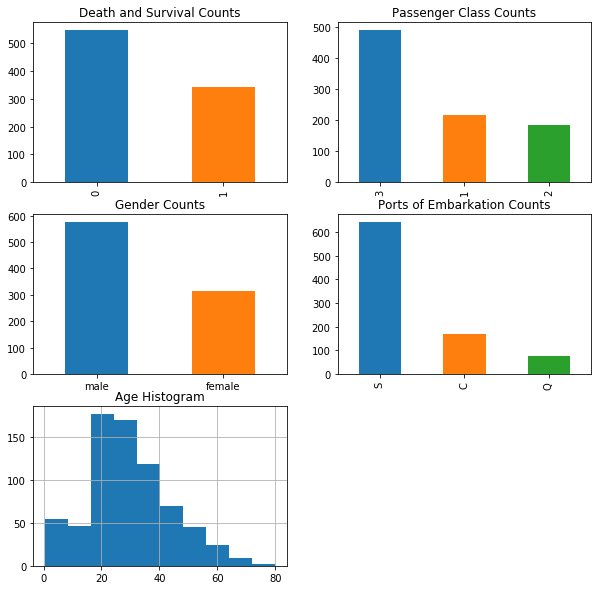

In [16]:
# Plot a few features to get a better idea of each:
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3,2)

## Plot death and survival counts
plt.subplot2grid(fig_dims, (0,0))
df_train['Survived'].value_counts().plot(kind='bar',
                                        title='Death and Survival Counts')

## Plot Pclass counts
plt.subplot2grid(fig_dims, (0, 1))
df_train['Pclass'].value_counts().plot(kind='bar',
                                      title='Passenger Class Counts')

## Plot Sex counts
plt.subplot2grid(fig_dims, (1, 0))
df_train['Sex'].value_counts().plot(kind='bar',
                                   title='Gender Counts')
plt.xticks(rotation=0)


## Plot Embarked counts
plt.subplot2grid(fig_dims, (1, 1))
df_train['Embarked'].value_counts().plot(kind='bar',
                                        title='Ports of Embarkation Counts')

## Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 0))
df_train['Age'].hist()
plt.title('Age Histogram')

plt.show()

In [17]:
## 生成Pclass和Survived的交叉表
pclass_xt = pd.crosstab(df_train['Pclass'], df_train['Survived'])
pclass_xt

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


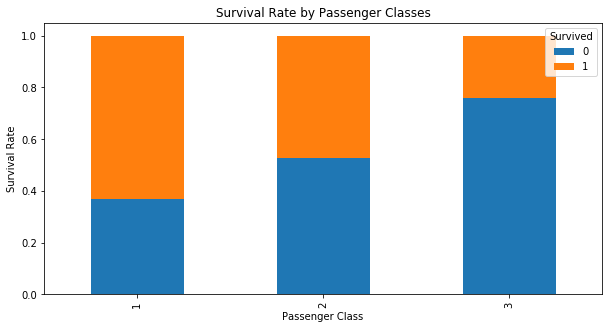

In [20]:
## Plot the cross tab:
# Normalize the cross tab to sum to 1
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar',
                  stacked=True,
                  title='Survival Rate by Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [21]:
sexes = sorted(df_train['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))

In [22]:
genders_mapping

{'female': 0, 'male': 1}

In [23]:
df_train['Sex_Val'] = df_train['Sex'].map(genders_mapping).astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


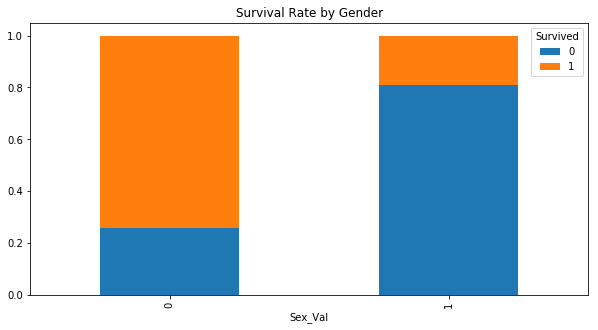

In [26]:
sex_val_xt = pd.crosstab(df_train['Sex_Val'], df_train['Survived'])
sex_val_xt_pct = sex_val_xt.div(sex_val_xt.sum(1).astype(float),axis=0)
sex_val_xt_pct.plot(kind='bar', stacked=True, title='Survival Rate by Gender')
plt.show()

In [28]:
# Count males and females in each Pclass:
passenger_classes = sorted(df_train['Pclass'].unique())

for p_class in passenger_classes:
    print('M: ', p_class, len(df_train[(df_train['Sex'] == 'male') & 
                             (df_train['Pclass'] == p_class)]))
    print('F: ', p_class, len(df_train[(df_train['Sex'] == 'female') & 
                             (df_train['Pclass'] == p_class)]))

M:  1 122
F:  1 94
M:  2 108
F:  2 76
M:  3 347
F:  3 144


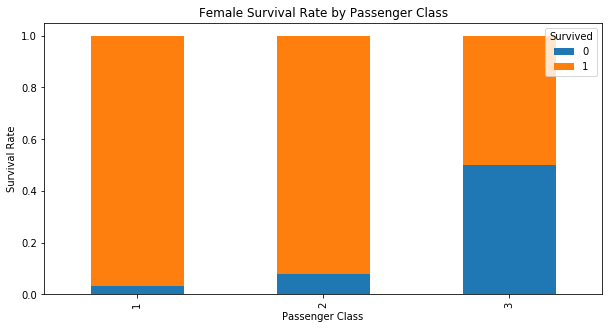

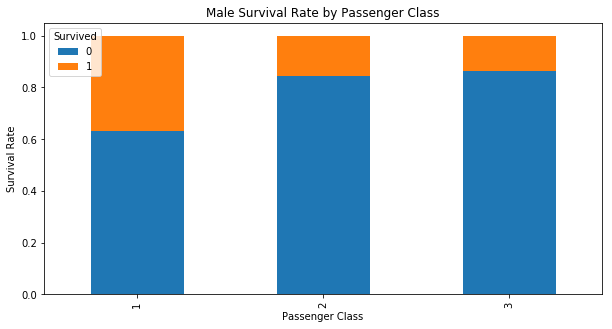

In [32]:
## Plot survival rate by Sex and Pclass
females_df = df_train[df_train['Sex'] == 'female']
females_xt = pd.crosstab(females_df['Pclass'], df_train['Survived'])
females_xt_pct = females_xt.div(females_xt.sum(1).astype(float), axis=0)
females_xt_pct.plot(kind='bar',
                   stacked=True,
                   title='Female Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

## Plot survival rate by Pclass
males_df = df_train[df_train['Sex'] == 'male']
males_xt = pd.crosstab(males_df['Pclass'], df_train['Survived'])
males_xt_pct = males_xt.div(males_xt.sum(1).astype(float), axis=0)
males_xt_pct.plot(kind='bar',
                 stacked=True,
                 title='Male Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [33]:
## Feature: Embarked

df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [93]:
embarked_locs = (df_train['Embarked'].unique())

In [95]:
embarked_locs_mapping = dict(zip(embarked_locs,
                                range(0, len(embarked_locs) + 1)))
embarked_locs_mapping

{'S': 0, 'C': 1, 'Q': 2, nan: 3}

In [97]:
df_train['Embarked_Val'] = df_train['Embarked'] \
                               .map(embarked_locs_mapping) \
                               .astype(int)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


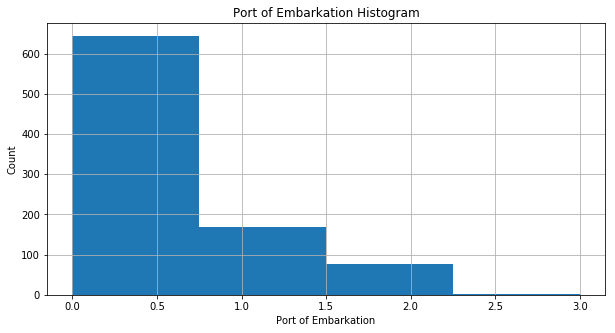

In [98]:
df_train['Embarked_Val'].hist(bins=len(embarked_locs), range=(0, 3))
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [99]:
if len(df_train[df_train['Embarked'].isnull()] > 0):
    df_train.replace({'Embarked_Val' : 
                   { embarked_locs_mapping[np.nan] : embarked_locs_mapping['S'] 
                   }
               }, 
               inplace=True)

In [100]:
embarked_locs = sorted(df_train['Embarked_Val'].unique())
embarked_locs

[0, 1, 2]

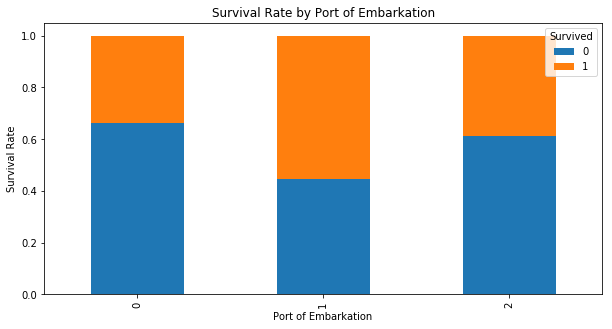

In [103]:
embarked_val_xt = pd.crosstab(df_train['Embarked_Val'], df_train['Survived'])
embarked_val_xt_pct = embarked_val_xt.div(embarked_val_xt.sum(1).astype(float),
                                         axis=0)
embarked_val_xt_pct.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

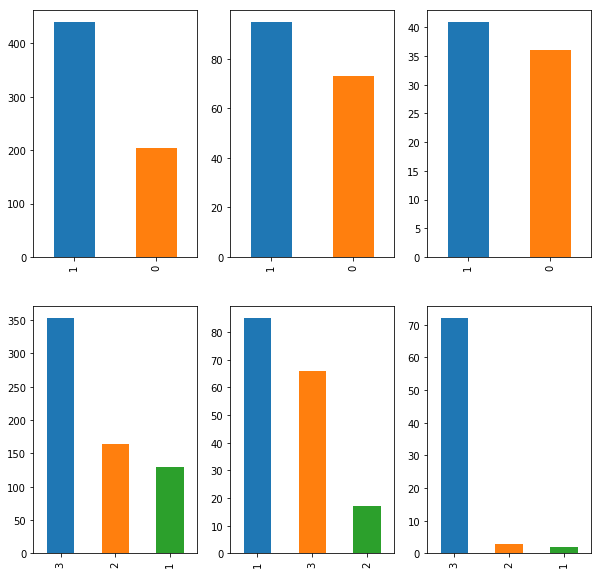

In [112]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 

rows = 2
cols = 3
col_names = ('Sex_Val', 'Pclass')

for portIdx in embarked_locs:
    for colIdx in range(0, len(col_names)):
        plt.subplot2grid((rows, cols), (colIdx, portIdx))
        df_train[df_train['Embarked_Val'] == portIdx][col_names[colIdx]].value_counts().plot(kind='bar')

plt.show()

In [113]:
df_train = pd.concat([df_train, pd.get_dummies(df_train['Embarked_Val'], prefix='Embarked_Val')], axis=1)

In [114]:
## Feature: Age
df_train[df_train['Age'].isnull()][['Sex', 'Pclass', 'Age']].head()

,Sex,Pclass,Age
5,male,3,NaN
17,male,2,NaN
19,female,3,NaN
26,male,3,NaN
28,female,3,NaN


In [115]:
## To keep Age in tact, make a copy of it called AgeFill
## that we will use to fill in the missing ages:
df_train['AgeFill'] = df_train['Age']

## Populate AgeFill
df_train['AgeFill'] = df_train['AgeFill'].groupby([df_train['Sex_Val'], df_train['Pclass']]) \
                      .apply(lambda x: x.fillna(x.median()))

In [116]:
len(df_train[df_train['AgeFill'].isnull()])

0

/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


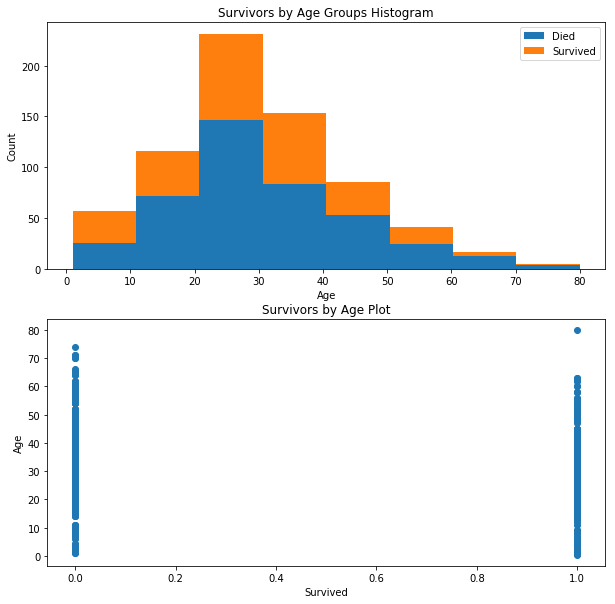

In [121]:
# Set up a grid of plots
fig, axes = plt.subplots(2, 1, figsize=fizsize_with_subplots)

# Histogram of AgeFill segmented by Survived
df1 = df_train[df_train['Survived'] == 0]['Age']
df2 = df_train[df_train['Survived'] == 1]['Age']
max_age = max(df_train['AgeFill'])
axes[0].hist([df1, df2], 
             bins=int(max_age / bin_size), 
             range=(1, max_age), 
             stacked=True)
axes[0].legend(('Died', 'Survived'), loc='best')
axes[0].set_title('Survivors by Age Groups Histogram')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Scatter plot Survived and AgeFill
axes[1].scatter(df_train['Survived'], df_train['AgeFill'])
axes[1].set_title('Survivors by Age Plot')
axes[1].set_xlabel('Survived')
axes[1].set_ylabel('Age')
plt.show()

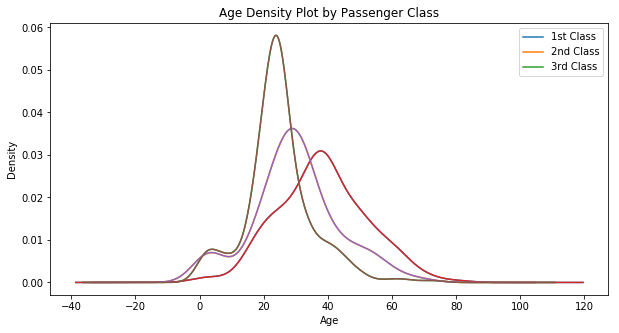

In [123]:
# Plot AgeFill density by Pclass:
for pclass in passenger_classes:
    df_train.AgeFill[df_train.Pclass == pclass].plot(kind='kde')
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

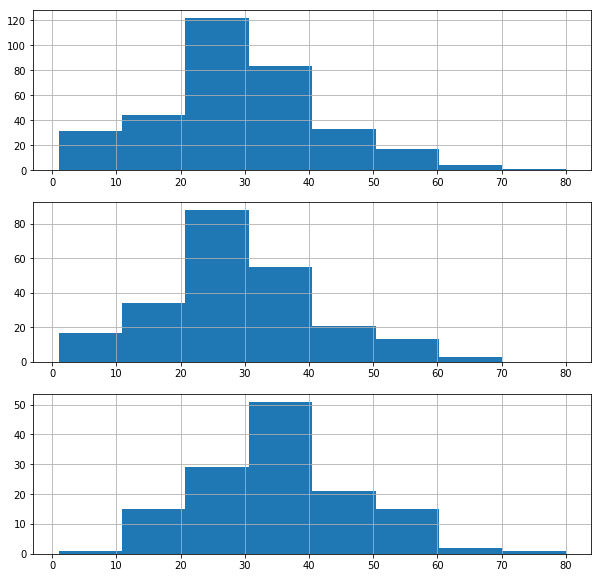

In [132]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 1)

# Plot the AgeFill histogram for Survivors
## 画出幸存者和年龄之间的关系
plt.subplot2grid(fig_dims, (0, 0))
survived_df = df_train[df_train['Survived'] == 1]
survived_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for Females
## 画出女性的年龄分布
plt.subplot2grid(fig_dims, (1, 0))
females_df = df_train[(df_train['Sex_Val'] == 0) & (df_train['Survived'] == 1)]
females_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))

# Plot the AgeFill histogram for first class passengers
## 画出头等舱的年龄分布
plt.subplot2grid(fig_dims, (2, 0))
class1_df = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)]
class1_df['AgeFill'].hist(bins=int(max_age / bin_size), range=(1, max_age))
plt.show()

In [133]:
## Feature: Family Size 
## 定义一个新功能FamilySize，它是Parch（父母或孩子的数量）和SibSp（兄弟姐妹或配偶的数量）的总和.

df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch']
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Val,Embarked_Val,Embarked_Val_0,Embarked_Val_1,Embarked_Val_2,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,0,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1,0,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1,0,0,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,1,0,0,35.0,0


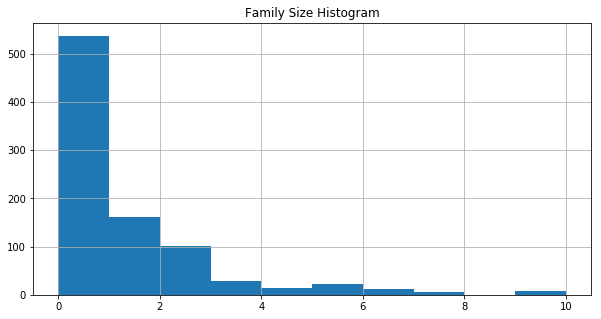

In [134]:
## Plot a histogram of FamilySize:
df_train['FamilySize'].hist()
plt.title('Family Size Histogram')
plt.show()

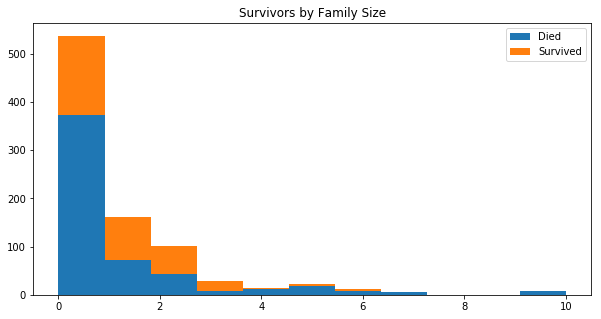

In [135]:
## Plot a histogram of AgeFill segmented by Survived.
family_sizes = sorted(df_train['FamilySize'].unique())
family_sizes_max = max(family_sizes)

df1 = df_train[df_train['Survived'] == 0]['FamilySize']
df2 = df_train[df_train['Survived'] == 1]['FamilySize']

plt.hist([df1, df2],
        bins=family_sizes_max + 1,
        range=(0, family_sizes_max),
        stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Family Size')
plt.show()

In [136]:
df_train.dtypes[df_train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [138]:
## Drop the columns we won't use.
df_train = df_train.drop(['Name', 'Sex', 'Ticket',
                         'Cabin', 'Embarked'], axis=1)

## Drop the following columns;
"""
1. The Age column since we will be using the AgeFill column instead
2. The SipSp and Parch columns since we will be using FamilySize instead
3. THe PassengerId column since it won't be used as a feature
4. The Embarked_Val as we decided to use dummy variables instead.
"""
df_train = df_train.drop(['Age', 'SibSp', 'Parch', 'PassengerId', 'Embarked_Val'], axis=1)
df_train.dtypes

Survived            int64
Pclass              int64
Fare              float64
Sex_Val             int64
Embarked_Val_0      uint8
Embarked_Val_1      uint8
Embarked_Val_2      uint8
AgeFill           float64
FamilySize          int64
dtype: object

In [145]:
train_data = df_train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , ...,  0.    , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, ...,  0.    , 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , ...,  0.    , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , ...,  0.    , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , ...,  0.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , ...,  1.    , 32.    ,  0.    ]])

In [170]:
## Data Wrangling Summary

def clean_data(df, drop_passenger_id):
    ## Get the unique values of Sex
    sexes = sorted(df['Sex'].unique())
    
    ## Generate a mapping of Sex from a string to a bumber representation
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
    embarked_locs = sorted(df['Embarked'].unique())
    embarked_locs_mapping = dict(zip(embarked_locs,
                                    range(0, len(embarked_locs) + 1)))
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked_Val')], axis=1)
    
    if len(df[df['Embarked'].isnull()] > 0):
        df.replace({'Embarked_Val':
                    {
                        embarked_locs_mapping[np.nan] : embarked_locs_mapping['S']
                    }
        },
                  inplace=True)
    
    ## Fill in missing values of Fare with average Fare
    if(len(df[df['Fare'].isnull()] > 0)):
        avg_fare = df['Fare'].mean()
        df.replace({None: avg_fare}, inplace=True)
        
    df['AgeFill'] = df['Age']
    
    df['AgeFill'] = df['AgeFill'].groupby([df['Sex_Val'], df['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df



In [175]:
## Random Forest: Training 
## Create the random forest object
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

##Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

## 'Survived' column values
train_target = train_data[:, 0]

## Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9809203142536476'

In [176]:
## Random Forest: Predicting
## Read the test data
df_test = pd.read_csv('/Users/liuchang/Desktop/all/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [177]:
## Data wrangle the test set and convert it to a numpy array
df_test = clean_data(df_test, drop_passenger_id=False)
test_data = df_test.values
test_data

array([[8.92000000e+02, 3.00000000e+00, 7.82920000e+00, ...,
        0.00000000e+00, 3.45000000e+01, 0.00000000e+00],
       [8.93000000e+02, 3.00000000e+00, 7.00000000e+00, ...,
        1.00000000e+00, 4.70000000e+01, 1.00000000e+00],
       [8.94000000e+02, 2.00000000e+00, 9.68750000e+00, ...,
        0.00000000e+00, 6.20000000e+01, 0.00000000e+00],
       ...,
       [1.30700000e+03, 3.00000000e+00, 7.25000000e+00, ...,
        1.00000000e+00, 3.85000000e+01, 0.00000000e+00],
       [1.30800000e+03, 3.00000000e+00, 8.05000000e+00, ...,
        1.00000000e+00, 3.56271885e+01, 0.00000000e+00],
       [1.30900000e+03, 3.00000000e+00, 2.23583000e+01, ...,
        0.00000000e+00, 3.56271885e+01, 2.00000000e+00]])

In [178]:
test_x = test_data[:, 1:]
test_y = clf.predict(test_x)

In [179]:
### Random Forest: Prepare for Kaggle Submission
df_test['Survived'] = test_y
df_test[['PassengerId', 'Survived']].to_csv('/Users/liuchang/Desktop/all/results-rf.csv', index=False)

In [180]:
## Evaluate Model accuracy 评估模型的准确性
from sklearn import metrics
from sklearn.cross_validation import train_test_split

## Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(
    train_features,
    train_target,
    test_size=0.20,
    random_state=0
)
print(train_features.shape, train_target.shape)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(891, 8) (891,)
(712, 8) (712,)
(179, 8) (179,)


In [181]:
## Use the new training data to fit the model, predict,
## and get the accuracy score:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.85


In [182]:
## Get the model and confusion matrix:
model_score = clf.score(test_x, test_y)
print("Model Score %.2f \n" % (model_score))

confusion_matrix = metrics.confusion_matrix(test_y, predict_y)
print("Confusion Matrix ", confusion_matrix)

Model Score 0.85 

Confusion Matrix  [[102   8]
 [ 19  50]]


In [183]:
print(confusion_matrix[0,0], confusion_matrix[0, 1])

102 8


In [184]:
print(confusion_matrix[1,0], confusion_matrix[1,1])

19 50


In [185]:
## Display the classification report:
## Precision = TP / TP + FP
## Recall = TP / TP + FN
## F1 = 2TP / 2TP + FP + FN
from sklearn.metrics import classification_report
print(classification_report(test_y,
                           predict_y,
                           target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.93      0.88       110
    Survived       0.86      0.72      0.79        69

 avg / total       0.85      0.85      0.85       179

